In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
colums_to_analyze = ["Date","HomeTeam","AwayTeam","FTHG","FTAG","FTR","HTHG","HTAG","HTR","HS","AS","HST","AST","HF","AF","HC","AC","HY","AY","HR","AR"]

#•FTHG = Full Time Home Team Goals
#•FTAG = Full Time Away Team Goals
#•FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)

#•HTHG = Half Time Home Team Goals
#•HTAG = Half Time Away Team Goals
#•HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
#•HS = Home Team Shots
#•AS = Away Team Shots
#•HST = Home Team Shots on Target
#•AST = Away Team Shots on Target
#•HC = Home Team Corners
#•AC = Away Team Corners
#•HF = Home Team Fouls Committed
#•AF = Away Team Fouls Committed
#•HY = Home Team Yellow Cards
#•AY = Away Team Yellow Cards
#•HR = Home Team Red Cards
#•AR = Away Team Red Cards





year='1516'
csv = pd.read_csv('assets/season-' + year + ".csv", usecols=colums_to_analyze)

In [2]:
    #grafico vittore (in casa/fuori)
    csv['result'] = 'draw'
    csv.loc[csv['FTR'] =='H', 'result'] = 'home'
    csv.loc[csv['FTR']=='A', 'result'] = 'away'
    csv.groupby('result')['result'].count()

result
away    110
draw     95
home    175
Name: result, dtype: int64

In [ ]:
csv.groupby('result')['result'].count().plot(kind='pie', autopct='%1.1f%%', figsize=(4,4))

In [ ]:
all_team = pd.DataFrame(csv).HomeTeam.unique()
print(all_team)

In [3]:
#Classifica
csv['Home_Points'] = csv.apply(
        lambda row: 3 if row['FTR'] == 'H' else 0 if row['FTR'] == 'A' else 1,
        axis=1)
csv['Away_Points']=csv.apply(
    lambda row: 3 if row['FTR'] == 'A' else 0 if row['FTR'] == 'H' else 1,
        axis=1)
home = pd.DataFrame(csv[['HomeTeam','Home_Points']])
away = pd.DataFrame(csv[['AwayTeam','Away_Points']])
home = home.groupby('HomeTeam').agg(sum)
away = away.groupby('AwayTeam').agg(sum)
home.rename(columns = {'HomeTeam':'Team','Home_Points':'Point'}, inplace=True)
away.rename(columns = {'AwayTeam':'Team','Away_Points':'Point'}, inplace=True)

overall = home + away
overall.sort_values(by=['Point'],ascending=False)


,Point
HomeTeam,
Juventus,91
Napoli,82
Roma,80
Inter,67
Fiorentina,64
Sassuolo,61
Milan,57
Lazio,54
Chievo,50


In [4]:
#Vittorie
csv['Winner'] = csv.apply(
        lambda row: row['HomeTeam'] if row['FTR'] == 'H' else row['AwayTeam'] if row['FTR'] == 'A' else np.NaN,
        axis=1)
csv['Winner_home'] = csv.apply(
        lambda row: row['HomeTeam'] if row['FTR'] == 'H' else np.NaN,
        axis=1)
csv['Winner_away'] = csv.apply(
        lambda row: row['AwayTeam'] if row['FTR'] == 'A' else np.NaN,
        axis=1)

csv['Winner'].value_counts()

Juventus      29
Napoli        25
Roma          23
Inter         20
Fiorentina    18
Sassuolo      16
Milan         15
Lazio         15
Genoa         13
Chievo        13
Empoli        12
Torino        12
Atalanta      11
Bologna       11
Sampdoria     10
Udinese       10
Palermo       10
Carpi          9
Frosinone      8
Verona         5
Name: Winner, dtype: int64

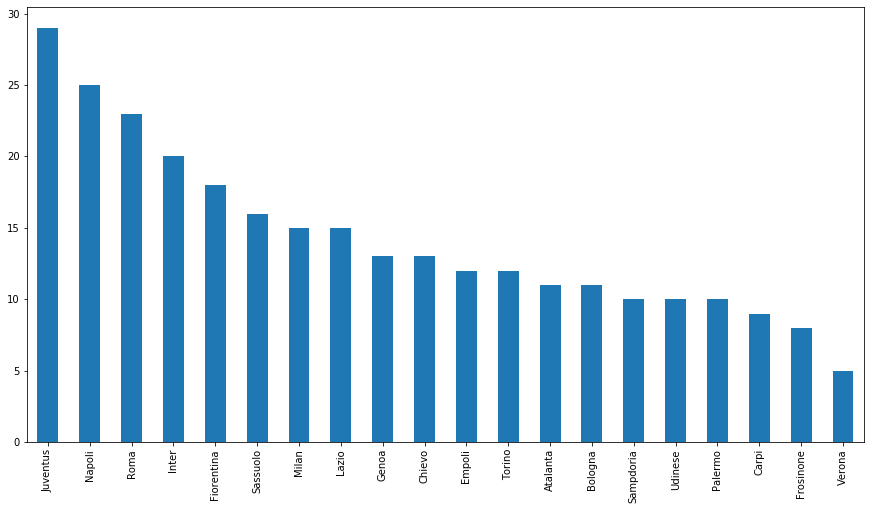

In [5]:
csv['Winner'].value_counts().plot(kind='bar',figsize=(15,8))

In [6]:
csv['Winner_home'].value_counts()

Juventus      16
Napoli        16
Inter         13
Roma          13
Fiorentina    11
Genoa         10
Lazio         10
Milan          9
Sassuolo       8
Atalanta       8
Sampdoria      8
Empoli         7
Chievo         7
Frosinone      6
Torino         6
Carpi          6
Udinese        6
Palermo        6
Bologna        5
Verona         4
Name: Winner_home, dtype: int64

In [ ]:
csv['Winner_home'].value_counts().plot(kind='bar',figsize=(15,8))

In [ ]:
csv['Winner_away'].value_counts()

In [ ]:
csv['Winner_away'].value_counts().plot(kind='bar',figsize=(15,8))

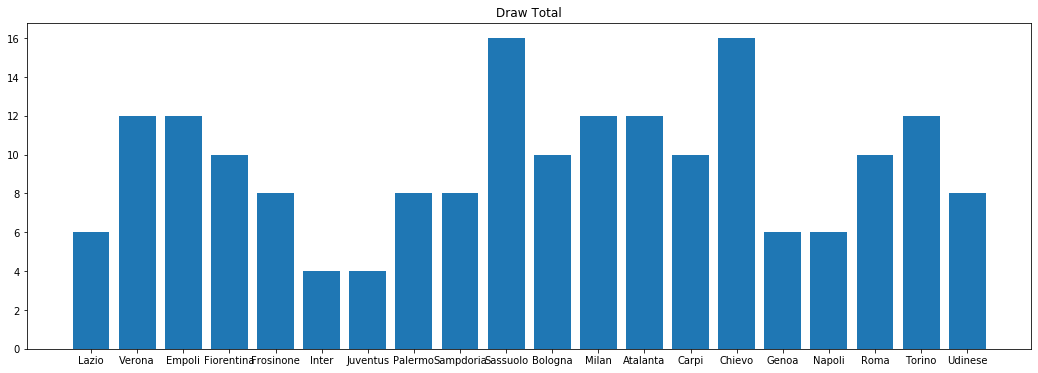

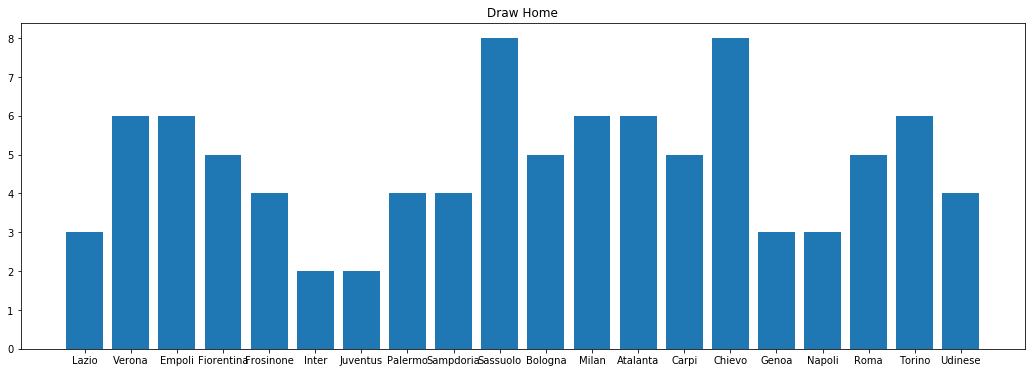

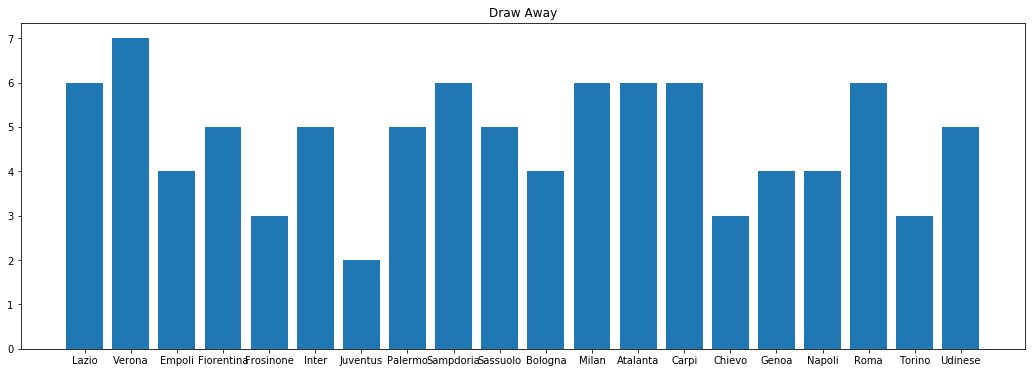

In [7]:
    dh = []
    da = []
    dt = []
    all_team = pd.DataFrame(csv).HomeTeam.unique()

    for team in all_team:
        dh.append(csv.loc[(csv["HomeTeam"] == team) & (csv["FTR"] == 'D')]["FTR"].count())
        da.append(csv.loc[(csv["AwayTeam"] == team) & (csv["FTR"] == 'D')]["FTR"].count())
        dt.append(dh[-1] + dh[-1])

    plt.figure(figsize=(18, 6))
    plt.title("Draw Total")
    plt.bar(all_team, dt)
    plt.show()

    plt.figure(figsize=(18, 6))
    plt.title("Draw Home")
    plt.bar(all_team, dh)
    plt.show()

    plt.figure(figsize=(18, 6))
    plt.title("Draw Away")
    plt.bar(all_team, da)
    plt.show()

In [ ]:
csv['lose'] = csv.apply(
        lambda row: row['HomeTeam'] if row['FTR'] == 'A' else row['AwayTeam'] if row['FTR'] == 'H' else np.NaN,
        axis=1)
csv['lose_home'] = csv.apply(
        lambda row: row['HomeTeam'] if row['FTR'] == 'A' else np.NaN,
        axis=1)
csv['lose_away'] = csv.apply(
        lambda row: row['AwayTeam'] if row['FTR'] == 'H' else np.NaN,
        axis=1)

csv['lose'].value_counts()

In [ ]:
csv['lose'].value_counts().plot(kind='bar',figsize=(15,8))

In [ ]:
csv['lose_home'].value_counts()

In [ ]:
csv['lose_home'].value_counts().plot(kind='bar',figsize=(15,8))

In [ ]:
csv['lose_away'].value_counts()

In [ ]:
csv['lose_away'].value_counts().plot(kind='bar',figsize=(15,8))

In [10]:
goals=csv.agg(
        {"FTHG": ["sum","mean"], "FTAG": ["sum","mean"]})
goals.rename(columns={'FTHG': 'Full Time Home Goals','FTAG':'Full Time Away Goals'})
goals

,FTHG,FTAG
sum,559.000000,420.000000
mean,1.471053,1.105263


In [11]:
goals_team=csv.groupby("HomeTeam").agg(
        {"FTHG": ["sum","mean"], "FTAG": ["sum","mean"]})
goals_team["total"]=goals_team["FTHG"]["sum"] + goals_team["FTAG"]["sum"]
goals_team=goals_team.rename(columns={'FTHG': 'Full Time Home Goals','FTAG':'Full Time Away Goals'})


goals_team=goals_team.sort_values(by=['total'],ascending=False)
goals_team

Full Time Home Goals           Full Time Away Goals           total
                            sum      mean                  sum      mean      
HomeTeam                                                                      
Napoli                       49  2.578947                   12  0.631579    61
Roma                         44  2.315789                   17  0.894737    61
Lazio                        32  1.684211                   23  1.210526    55
Sampdoria                    29  1.526316                   25  1.315789    54
Palermo                      24  1.263158                   30  1.578947    54
Verona                       21  1.105263                   30  1.578947    51
Milan                        28  1.473684                   22  1.157895    50
Fiorentina                   34  1.789474                   16  0.842105    50
Torino                       25  1.315789                   25  1.315789    50
Carpi                        23  1.210526                   26  1.368421    49
Genoa                        29  1.526316                   19  1.000000    48
Atalanta                     27  1.421053                   21  1.105263    48
Udinese                      18  0.947368                   28  1.473684    46
Sassuolo                     25  1.315789                   20  1.052632    45
Frosinone                    18  0.947368                   26  1.368421    44
Inter                        29  1.526316                   15  0.789474    44
Juventus                     37  1.947368                    6  0.315789    43
Chievo                       25  1.315789                   18  0.947368    43
Empoli                       22  1.157895                   20  1.052632    42
Bologna                      20  1.052632                   21  1.105263    41

In [ ]:
goals_team.plot(kind='bar',figsize=(16,15))

In [ ]:
shots=csv.groupby("HomeTeam").agg(
        {"HS": ["sum"], "AS": ["sum"]})
shots["total"]=shots["HS"]["sum"] + shots["AS"]["sum"]
shots.rename(columns={'HS': 'Home Shots','AS':'Away Shot'})

shots=shots.sort_values(by=['total'],ascending=False)
shots

In [ ]:
shots.plot(kind='bar',figsize=(20,10))

In [ ]:
shots_target=csv.groupby("HomeTeam").agg(
        {"HST": ["sum"], "AST": ["sum"]})
shots_target["total"]=shots_target["HST"]["sum"] + shots_target["AST"]["sum"]
shots_target.rename(columns={'HST': 'Home Shots on Target','AST':'Away Shot on Target'})

shots_target=shots_target.sort_values(by=['total'],ascending=False)
shots_target

In [ ]:
shots_target.plot(kind='bar',figsize=(20,10))

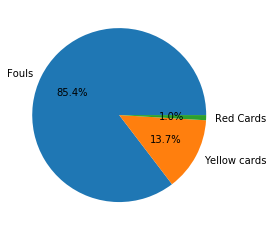

In [8]:

    tot=csv[['HY','AY','HR','AR','HF','AF']].sum()
    tot['fouls']=tot['HF']+tot['AF']
    tot['yellow']=tot['HY']+tot['AY']
    tot['red']=tot['HR'] + tot['AR']
    labels='Fouls','Yellow cards','Red Cards'
    sizes=[tot['fouls'],tot['yellow'],tot['red']]
    plt.pie(sizes,labels=labels,autopct='%1.1f%%')
    plt.show()

In [9]:
fouls=csv.groupby("HomeTeam").agg(foul_home=('HF',sum),
                                  foul_away=('AF',sum),
                                  yellow_card_home=('HY',sum),
                                  yellow_card_away=('AY',sum),
                                  red_card_home=('HR',sum),
                                  red_card_away=('AR',sum) )

fouls['foul_total']=fouls['foul_home']+fouls['foul_away']
fouls['yellow_total']=fouls['yellow_card_home']+fouls['yellow_card_away']
fouls['red_total']=fouls['red_card_home']+fouls['red_card_away']

fouls=fouls.sort_values(by=['foul_total'],ascending=False)
fouls

,foul_home,foul_away,yellow_card_home,yellow_card_away,red_card_home,red_card_away,foul_total,yellow_total,red_total
HomeTeam,,,,,,,,,
Carpi,327,304,50,43,3,4,631,93,7
Frosinone,325,306,52,54,2,6,631,106,8
Torino,336,278,43,51,3,3,614,94,6
Genoa,293,317,42,52,5,4,610,94,9
Udinese,303,304,47,49,6,5,607,96,11
Sassuolo,265,340,42,43,5,8,605,85,13
Atalanta,301,299,41,54,4,4,600,95,8
Empoli,245,355,35,56,2,1,600,91,3
Verona,317,277,43,44,2,4,594,87,6


In [ ]:
fouls[['foul_total',"yellow_total","red_total"]].plot(kind='barh',figsize=(25,8))